In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import heapq
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [2]:
movie_reviews = pd.read_csv("IMDB Dataset.csv")

In [3]:
movie_reviews.isnull().values.any()
movie_reviews.shape
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
movie_reviews["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

<AxesSubplot:xlabel='sentiment', ylabel='count'>

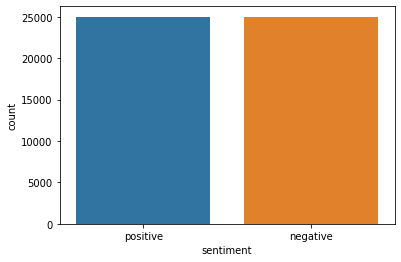

In [5]:
sns.countplot(x='sentiment', data=movie_reviews)

In [6]:
tag_re = re.compile(r'<[^>]+>')
def remove_tags(text):
    return tag_re.sub('', text)

for i in range(len(movie_reviews)):
    movie_reviews["review"][i] = movie_reviews["review"][i].lower()
    movie_reviews["review"][i] = re.sub(r"\s+[a-zA-Z]\s+", ' ', movie_reviews["review"][i])
    movie_reviews["review"][i]= re.sub(r'\s+', ' ', movie_reviews["review"][i])
    movie_reviews["review"][i] = remove_tags(movie_reviews["review"][i])
    movie_reviews["review"][i] = re.sub(r'[^A-Za-z. ]', '', movie_reviews["review"][i])

In [7]:
movie_reviews.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was wonderful way to spend time...,positive
3,basically theres family where little boy jake ...,negative
4,petter matteis love in the time of money is vi...,positive


In [8]:
X = []
sentences = list(movie_reviews['review'])
for sentence in sentences:
    X.append(sentence)

In [9]:
y = movie_reviews['sentiment']
print(y.dtype)
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))
print(y.dtype)

object
int64


In [10]:
print(y)

[1 1 1 ... 0 0 0]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
#embedding layer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [13]:
print(X_train[0])

[171, 45, 772, 2072, 516, 294, 1, 103, 1875, 1964, 4181, 2, 794, 4800, 9, 1, 224, 1, 77, 879, 53, 49, 19, 100, 3, 1, 4131, 98, 33, 22, 34, 115, 1133, 9, 7, 5, 2280, 1150, 4, 444, 45, 536, 4, 89, 31, 20, 36, 913, 422, 12, 1, 170, 4, 3040, 21, 4206, 17, 2887, 9, 42, 72, 222, 71, 121, 6, 79, 3006, 189, 17, 245, 2, 1, 440, 67, 212, 4833, 139, 18, 59, 25, 12, 74, 351, 294, 16, 15, 7, 212, 23, 298, 9, 11, 1, 113, 438, 2, 11, 1, 1638, 626, 63, 411, 368, 87, 114, 45, 109, 377, 31, 32, 15, 40, 10, 89, 458, 12, 370, 1952, 57, 6, 1, 464, 216, 979, 4, 4088, 6, 175, 3, 3069, 678, 611, 9, 68, 234, 107, 817, 32, 167, 27, 213, 171, 1, 415, 356, 54, 3789, 271, 154, 1641, 190, 5, 1, 703, 1854, 1, 1151, 3, 2957, 3687, 1810, 2, 146, 139, 226, 3, 204, 315, 2, 139, 1054, 13, 85, 3, 128, 2576, 15, 149, 97, 3, 1, 3972, 294, 8, 14, 966, 32, 1, 510, 242, 69, 73, 103, 103, 682, 58, 83, 63, 1303, 4, 228, 128, 20, 4228, 29, 135, 201, 1108, 11, 3618, 29, 2268, 2, 6, 8, 5, 432, 11, 615, 3, 1, 697, 2869, 1, 1235, 2, 

In [14]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [15]:
X[0]

'one of the other reviewers has mentioned that after watching just  oz episode youll be hooked. they are right as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go. trust me this is not show for the faint hearted or timid. this show pulls no punches with regards to drugs sex or violence. its is hardcore in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda. em city is home to many..aryans muslims gangstas latinos christians italians irish and more....so scuffles death stares dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare. forget 

In [16]:
print(len(X))

50000


In [17]:
wordfreq = {}
for i in range(len(X)):
    tokens = nltk.word_tokenize(X[i])
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [18]:
most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)

In [19]:
most_freq[0]

'the'

In [20]:
for i in range(len(most_freq)):
    most_freq[i] = [w for w in most_freq[i] if w not in nltk.corpus.stopwords.words('english')]

print(most_freq[0])

In [ ]:
word2vec = Word2Vec(most_freq)
print(word2vec[0])